# <a id="#">Task 2 – Image IO, Histograms, Intensity clipping</a>

In [1]:
import numpy
import matplotlib.pyplot as plt


---

## Image IO

**<a id="#">Task 2.1.</a>** Enter your solution below:

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.25490198, 0.25490198, ..., 0.01568628, 0.01960784,
        0.        ],
       [0.        , 0.2509804 , 0.24313726, ..., 0.00784314, 0.01568628,
        0.        ],
       ...,
       [0.        , 0.02745098, 0.01960784, ..., 0.01960784, 0.01960784,
        0.        ],
       [0.        , 0.02745098, 0.02352941, ..., 0.01568628, 0.01568628,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)

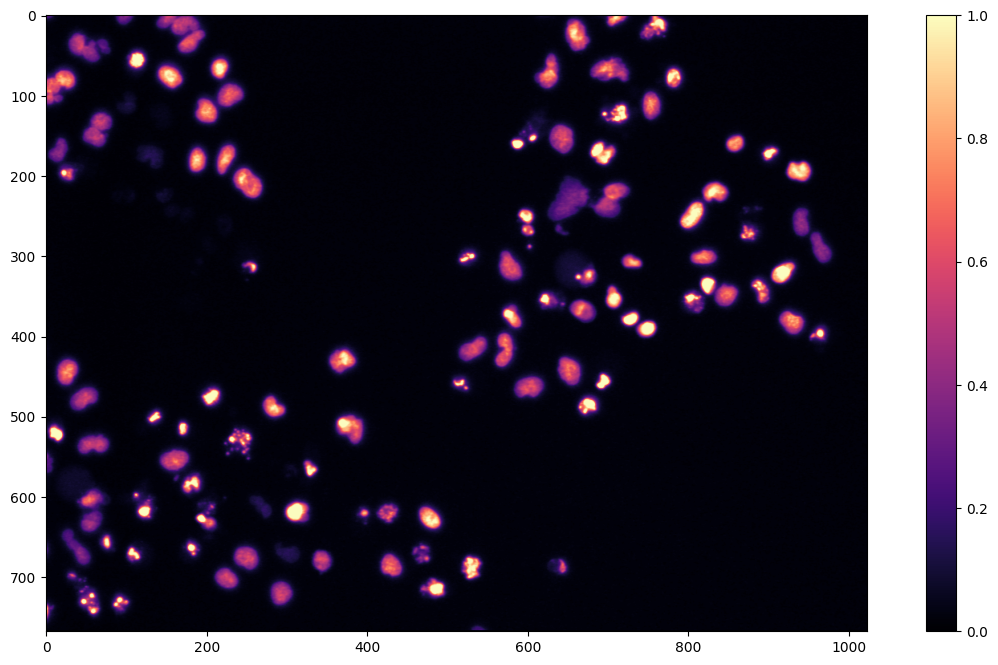

In [44]:
img = plt.imread('data/cells.png')
plt.figure(figsize=(15,8))
plt.imshow(img, 'magma')
plt.colorbar() 

---

## Histograms

**<a id="#">Task 2.2.</a>** Enter your solution below:

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

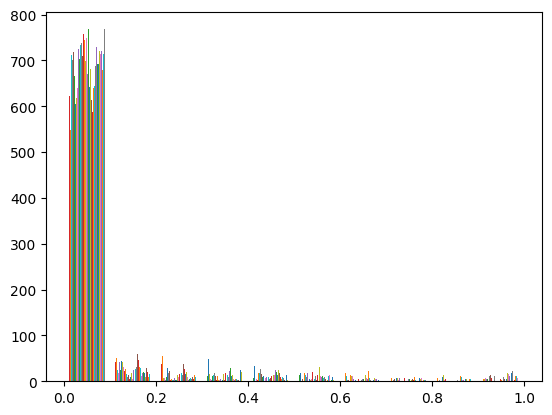

In [52]:

plt.hist(img)
img.flatten()

---

## Intensity clipping

First we define some fixed thresholds $T_1$, $T_2$:

In [53]:
T1 = 0.31
T2 = 0.59

### Using `ndarray.clip` method

**<a id="#">Task 2.3.1.</a>** Enter your solution below:

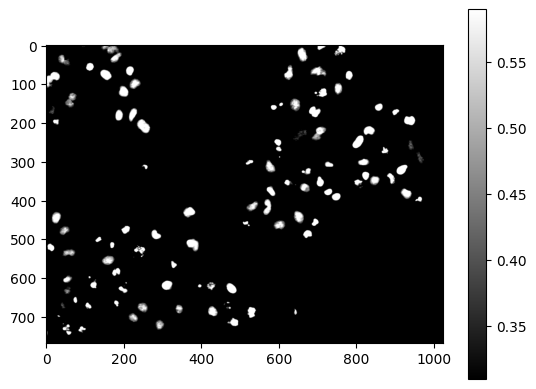

In [57]:
img.clip(T1, T2)
plt.imshow(img.clip(T1, T2), 'gray')
plt.colorbar()

### Not using the `ndarray.clip` method

**<a id="#">Task 2.3.2 (a).</a>** Enter your solution below:

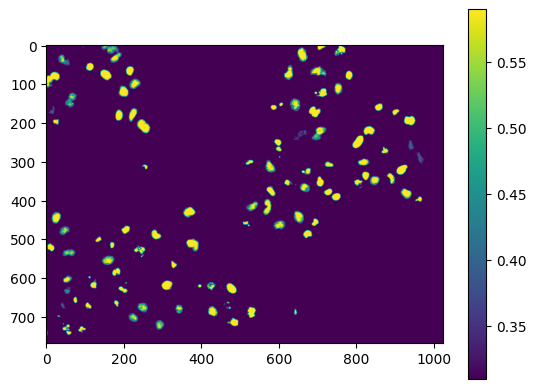

In [93]:
result = img.copy()
h = img.shape[0]
w = img.shape[1]
h, w = img.shape
for y in range(h):
    for x in range(w):
        if img[y, x] < T1:
            result[y, x] = T1
        elif img[y, x] > T2:
            result[y, x] = T2
        else:
            result[y, x] = img[y, x]

plt.imshow(result)
plt.colorbar()

**<a id="#">Task 2.3.2 (b).</a>** Enter your solution below:

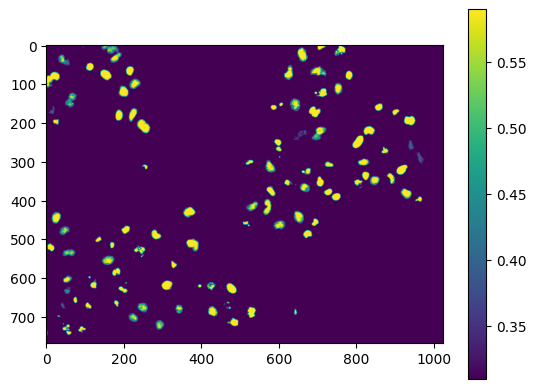

In [108]:
result = img.copy()
for i in numpy.ndindex(img.shape):
        if img[i] < T1:
            result[i] = T1
        elif img[i] > T2:
            result[i] = T2
        else:
            result[i] = img[i]

plt.imshow(result)
plt.colorbar()

In [106]:
i

(767, 1023)

---

## Writing re-usable code (bonus)

**<a id="#">Task 2.3.4.</a>** Finish the implementation of the function `clip_image` below, by replacing the comment line (the one which starts with `#`) with your code:

In [112]:
def clip_image(img, T1, T2):
    result = img.copy()
    for i in numpy.ndindex(img.shape):
            if img[i] < T1:
                result[i] = T1
            elif img[i] > T2:
                result[i] = T2
            else:
                result[i] = img[i]
    return result

**Hints:**
1. The implementation of the function starts after the `def`-line. Any instructions written *(i)* below this line and *(ii)* indented to the right will be run *from top to bottom* whenever you use this function. The execution of the function ends when the last instruction is reached or a `return` statement is encountered.
2. The purpose of the function `clip_image` is that it takes an *input* image `img` (along with two thresholds) and returns an *output* image (the clipped image). Make sure that you do *not* change the original input image!

We are going to check that the solution produced by `clip_img` equals the solution `ndarray.clip` produces. If the image you have loaded is not referenced by the variable `img` in your solution for **Task 2.1**, replace `img` by the name of the variable you used to reference the loaded image:

In [113]:
assert (clip_image(img, T1, T2) == img.clip(T1, T2)).all()

Now, we are going to show the clipping results produced using your `clip_image` implementation for different thresholds (`T1`, `T2`). The code below already shows the results for a pair of *two* thresholds. Supplement the code by adding the result for a *third* pair of thresholds!

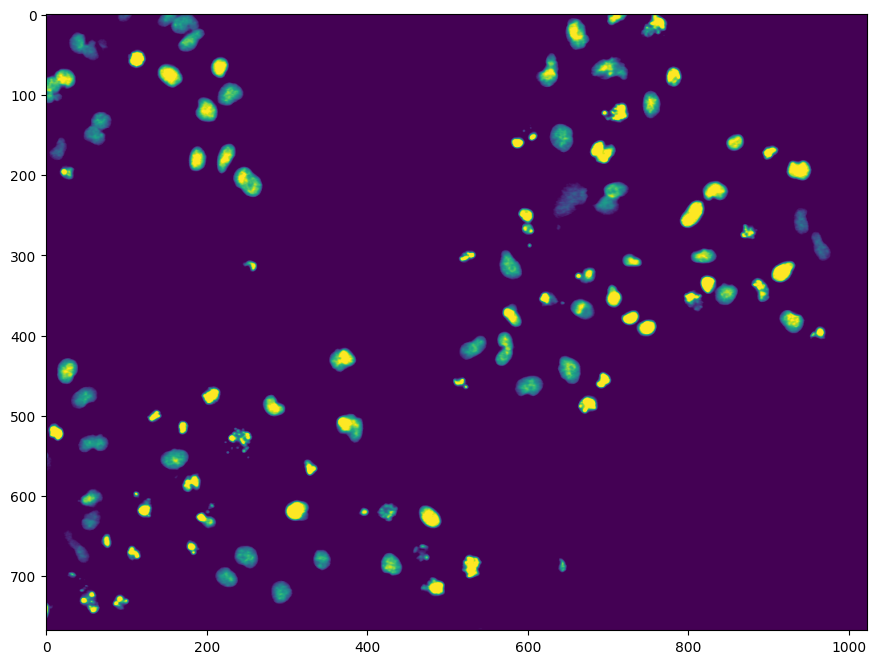

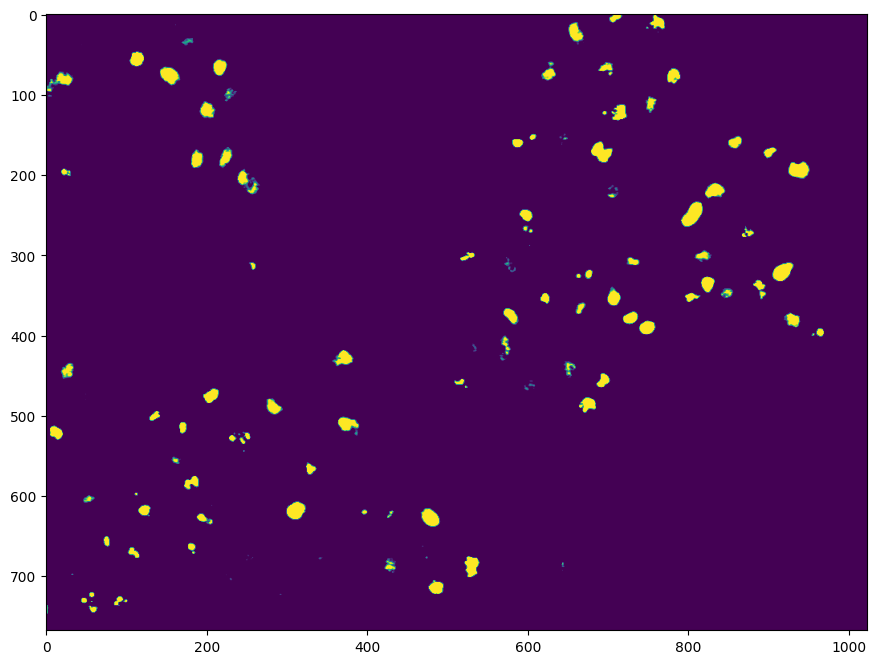

In [115]:
plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.2, 0.8))

plt.figure(figsize=(15,8))
plt.imshow(clip_image(img, 0.6, 0.7))

# here goes your code